#📌 Урок: Визуализация данных с помощью Pandas и Matplotlib
# 📖 Теоретический минимум
## 🔹 Основные библиотеки визуализации
Matplotlib - базовая библиотека для создания статических, анимированных и интерактивных визуализаций

Pandas - встроенные методы визуализации на основе Matplotlib

Seaborn - библиотека для создания статистических графиков (работает поверх Matplotlib)

## 🔹 Типы графиков и их применение
Линейные графики - тенденции изменения во времени

Столбчатые диаграммы - сравнение категориальных данных

Круговые диаграммы - доли составных частей

Гистограммы - распределение данных

Точечные диаграммы - взаимосвязь между двумя переменными

## 🔹 Основные принципы хорошей визуализации
Простота и ясность

Правильный выбор типа графика

Адекватные подписи и легенда

Оптимальное использование цвета

Отсутствие визуального шума


## 📖 Материалы

https://vkvideo.ru/video-194554202_456239677

https://vkvideo.ru/playlist/-16108331_55984952








In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Загрузка данных из файла Excel
url = 'https://docs.google.com/spreadsheets/d/1y9ekfl_0NOFLQtwqzXcJdijcMqquSDUn_XqtW-S7R3Q/export?format=xlsx'

# Чтение листов в два отдельных DataFrame
reservoir_df = pd.read_excel(url, sheet_name='Reservoir', index_col=False)
wells_df = pd.read_excel(url, sheet_name='Wells', index_col=False, names=['date',	'field_id',	'well_id', 'oil',	'gas',	'water'])


# 🏆 Задания

## 1️⃣ Линейный график динамики добычи нефти
**Задача:**
 Напишите функцию принимающую месторождение и имя скважины и формирующую график добычи нефти по годам

In [4]:
reservoir_df.head()

,date,field_id,well_id,reserves,pressure,oil_density
0,2020-01-01,Старое,1,5428,189,860
1,2020-01-01,Старое,2,5234,193,860
2,2020-01-01,Старое,3,5142,180,860
3,2020-01-01,Старое,3а,5341,180,860
4,2020-01-01,Старое,5,5381,191,860


In [5]:
wells_df.head()

,date,field_id,well_id,oil,gas,water
0,2021-07-01 00:00:00,Новое,1,128.048011,0,0.000000
1,2024-08-01 00:00:00,Старое,1,2.553258,14.42423,274.737692
2,2022-09-01 00:00:00,Старое,3а,0.982410,25.353305,182.408922
3,2023-11-01 00:00:00,Старое,3а,0.754156,25.149471,228.776968
4,2020-04-01 00:00:00,Новое,1,167.177177,0,0.000000


In [6]:
wells_df = wells_df.dropna(how="all")

In [7]:
print(wells_df.iloc[0])

date        2021-07-01 00:00:00
field_id                  Новое
well_id                       1
oil                  128.048011
gas                           0
water                       0.0
Name: 0, dtype: object


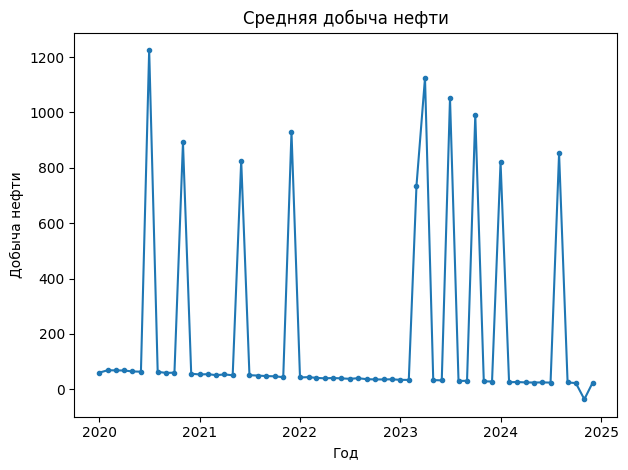

In [8]:
wells_df['date'] = pd.to_datetime(wells_df['date'], errors= 'coerce')
gr = wells_df.groupby('date')['oil'].mean().reset_index()

plt.plot(gr["date"], gr["oil"], marker=".")
plt.title('Средняя добыча нефти')
plt.xlabel('Год')
plt.ylabel('Добыча нефти')
plt.tight_layout()
plt.show()


## 2️⃣ Столбчатая диаграмма

**Задача:**

Напишите функцию формирующую cравнение добычи по месторождениям (столбчатая диаграмма)




  field_id         oil         gas       water
0    Новое  118.128151         0.0    0.000000
1   Старое    2.622548  192.999401  176.817514


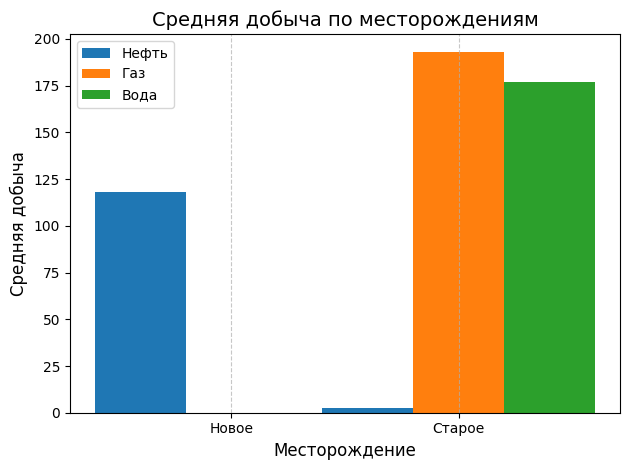

In [9]:
import numpy as np

field_avg = wells_df.groupby("field_id")[["oil", "gas", "water"]].mean().reset_index()
field_avg_sorted = field_avg.sort_values("oil", ascending=False)
print(field_avg)
positions = range(len(field_avg_sorted))
bar_width = 0.4
bars_oil = plt.bar(
    [p - bar_width for p in positions],
    field_avg_sorted["oil"],
    width=bar_width,
    label="Нефть",
)
bars_gas = plt.bar(positions, field_avg_sorted["gas"], width=bar_width, label="Газ")
bars_water = plt.bar(
    [p + bar_width for p in positions],
    field_avg_sorted["water"],
    width=bar_width,
    label="Вода",
)

plt.title("Средняя добыча по месторождениям", fontsize=14)
plt.xlabel("Месторождение", fontsize=12)
plt.ylabel("Средняя добыча", fontsize=12)
plt.xticks(positions, field_avg_sorted["field_id"])
plt.legend()
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

## 3️⃣  Круговая диаграмма
**Задача:**Напишите функцию формирующую визуализацию накопленной добычи нефти по скважинам одного месторождения (круговая диаграмма)

---



In [10]:
wells_df = wells_df.drop(wells_df[wells_df["well_id"] == "unknown"].index)

  well_id           oil
0       1  42390.376706
1       2  25730.011649
2       3  74925.931138
3       5    348.854133
4      3а  48483.641627


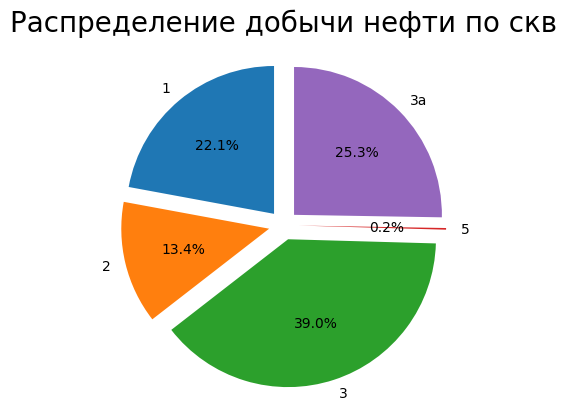

In [11]:
import numpy as np

well_avg = wells_df.groupby("well_id")["oil"].sum().reset_index()
print(well_avg)
data = pd.DataFrame({"Скважины": well_avg["well_id"], "Добыча": well_avg["oil"]})
explode = (0.1, 0.1, 0.1, 0.1, 0.1)
plt.pie(
    data["Добыча"],
    labels=data["Скважины"],
    startangle=90,
    autopct="%1.1f%%",
    explode=explode,
)

plt.title("Распределение добычи нефти по скв", fontsize=20)
plt.show()


## 4️⃣   Tornado plot


**Задача:**  Постройте tornado plot для визуализации накопленной добычи жидкости для каждой скважины.
---




  well_id           oil         water        liquid
3       5    348.854133  19959.927058  20308.781190
1       2  25730.011649  21308.262913  47038.274561
0       1  42390.376706  21451.503885  63841.880591
4      3а  48483.641627  21081.495470  69565.137097
2       3  74925.931138  21437.177569  96363.108707


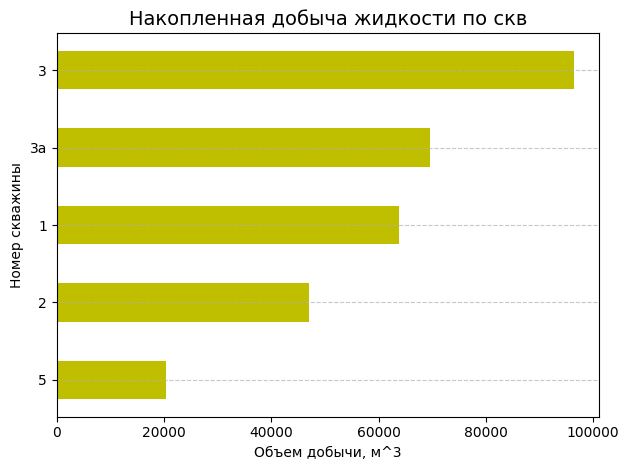

In [29]:
import numpy as np

well_avg = wells_df.groupby("well_id")[["oil", "water"]].sum().reset_index()
well_avg["liquid"] = well_avg["oil"] + well_avg["water"]
well_avg = well_avg.sort_values("liquid")
print(well_avg)

bar_height = 0.5

bars_liquid = plt.barh(
    well_avg["well_id"].astype(
        str
    ),  
    well_avg["liquid"],
    height=bar_height,
    color='y',
)

plt.title("Накопленная добыча жидкости по скв", fontsize=14)
plt.xlabel("Объем добычи, м^3", fontsize=10)
plt.ylabel("Номер скважины", fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


## 5️⃣ 3D визуализации
**Задача:**

Создайте изображение в 3D для отображения каждой скважины в осях накопленный дебит нефти, газа, воды

---


NameError: name 'plot_data' is not defined

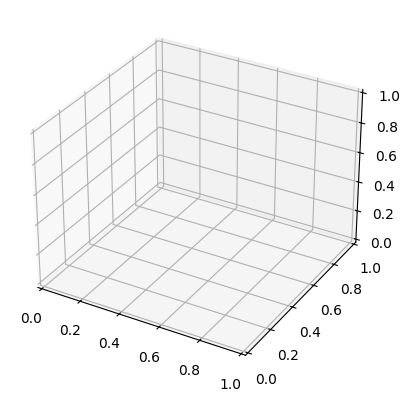

In [13]:
# Подсказка
ax = plt.figure().add_subplot(projection='3d')

x =  plot_data.oil # Накопленная нефть
y = plot_data.gas # Накопленный газ
z = plot_data.water # Накопленная вода



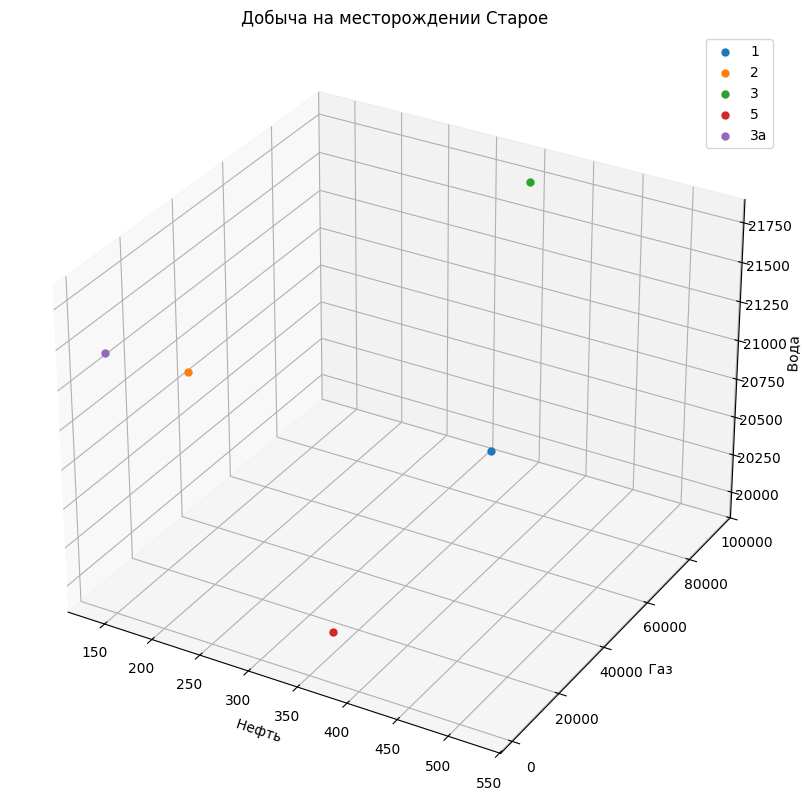

In [37]:
def production_3d(field):
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111, projection="3d")

    filtered_data = wells_df[wells_df["field_id"] == field]
    grouped = (
        filtered_data.groupby("well_id")[["oil", "gas", "water"]].sum().reset_index()
    )

    for _, row in grouped.iterrows():
        ax.scatter(
            row["oil"],
            row["gas"],
            row["water"],
            marker=".",
            label=row["well_id"],
            s=100,
        )
    ax.set_xlabel(" Нефть")
    ax.set_ylabel(" Газ")
    ax.set_zlabel(" Вода")
    plt.title(f"Добыча на месторождении {field}")
    ax.legend()


production_3d("Старое")